In [6]:
from sympy import *
import numpy as np
import numpy.linalg as la
from tabulate import tabulate
import scipy.optimize as opt
import scipy
from scipy import stats

from matplotlib import pyplot as plt
import matplotlib as mpl

font = {'family' : 'Times New Roman',
        'weight' : 'normal',
        'size'   : 12}
mpl.rc('font', **font)
#save_path = r'C:\Users\reape\Desktop\Sp24\NPRE 455\CP2\Plots\\'

# Part A

C Values:


Matrix([
[-3.83137845148429],
[-7.99267986248097],
[ 26.6666666666667]])


Analytical Flux:


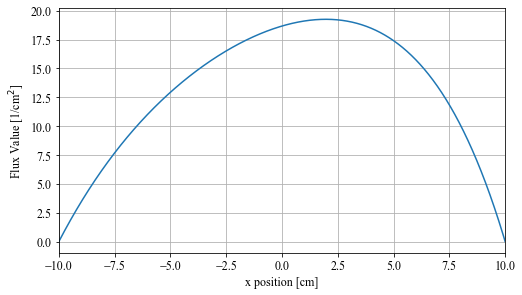

In [2]:
#Part A
a, D, L = 20, 1, 5
arr_len = 25000

#Matrix Equations & Coefficients
Coeff_arrA = np.array([(0,0,1),
                        (np.sinh(-a/2/L),np.cosh(-a/2/L),np.exp(-1/2)),
                        (np.sinh(a/2/L),np.cosh(a/2/L),np.exp(1/2))])
Soln_arrA = np.array([1/(D*(1/L**2-1/a**2)), 0, 0])

C1, C2, C3 = (la.inv(Coeff_arrA)@Soln_arrA)[:]

#Flux Profile
def phi_ana(n):
    x = np.linspace(-a/2,a/2, arr_len)
    fluxA = C1*np.sinh(x/L) + C2*np.cosh(x/L) + C3*np.exp(x/a)
    return x, fluxA

#Output
print('C Values:'), display(Matrix([C1, C2, C3]))

print('\nAnalytical Flux:')
plt.figure(figsize=(8,4.5))
plt.plot(phi_ana(10)[0], phi_ana(10)[1])
plt.xlabel('x position [cm]'), plt.ylabel('Flux Value [1/cm$^{2}$]')
plt.grid(), plt.xlim(-a/2, a/2)
#plt.savefig(save_path+'1A.png', dpi=600)
plt.show()

# Part B

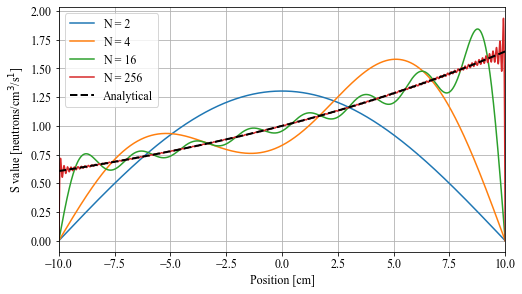

In [3]:
#Part B
#Functions
def Sx_ana(n):
    x = np.linspace(-a/2, a/2, arr_len)
    Sx = np.exp(x/a)
    return x, Sx

def Sn_gen(n):
    x = np.linspace(-a/2, a/2, arr_len)
    Sx = np.exp(x/a)
    if n%2 == 0:
        Sn = 2/a*np.trapz(Sx*np.sin(n*np.pi*x/a), x)
    elif n%2 != 0:
        Sn = 2/a*np.trapz(Sx*np.cos(n*np.pi*x/a), x)
    return Sn

def Sx_gen(n):
    x = np.linspace(-a/2, a/2, arr_len)
    Sx_approx = np.zeros(len(x))
    for i in range(n):
        if i%2 == 0:
            Sx_approx += Sn_gen(i)*np.sin(i*np.pi*x/a)
        elif i%2 != 0:
            Sx_approx += Sn_gen(i)*np.cos(i*np.pi*x/a)
    return Sx_approx

#Plotting
N_arrB = np.array([2,4,16,256])
plt.figure(figsize=(8,4.5))
for i in range(len(N_arrB)):
    plt.plot(np.linspace(-a/2, a/2, arr_len), Sx_gen(N_arrB[i]), label='N = {}'.format(N_arrB[i]))
plt.plot(Sx_ana(10)[0], Sx_ana(10)[1], label='Analytical', linewidth=2, linestyle='--', color='k')

plt.xlabel('Position [cm]'), plt.ylabel('S value [neutrons/cm$^{3}$/s$^{1}$]')
plt.legend(), plt.grid(), plt.xlim(-a/2, a/2)
#plt.savefig(save_path+'1B.png', dpi=600)
plt.show()

# Part C

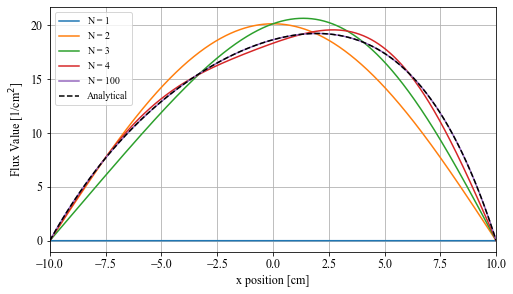

In [4]:
#Part C

#Functions
def Cn_gen(n):
    return Sn_gen(n)/D/(((n*np.pi/a)**2+1/L**2))

def phi_num(n):
    x = np.linspace(-a/2, a/2, arr_len)
    phi = np.zeros(len(x))
    for i in range(n):
        if i%2 == 0 and i != 0:
            phi += Cn_gen(i)*np.sin(i*np.pi*x/a)
        elif i%2 != 0:
            phi += Cn_gen(i)*np.cos(i*np.pi*x/a)
    return phi

#Plotting
N_arrC = np.array([1,2,3,4,100])
plt.figure(figsize=(8,4.5))
for i in range(len(N_arrC)):
    plt.plot(np.linspace(-a/2, a/2, arr_len), phi_num(N_arrC[i]), label='N = {}'.format(N_arrC[i]))
plt.plot(phi_ana(10)[0], phi_ana(10)[1], label='Analytical', linestyle='--', color='k')
plt.xlabel('x position [cm]'), plt.ylabel('Flux Value [1/cm$^{2}$]')
plt.grid(), plt.legend(loc='upper left', fontsize=10), plt.xlim(-a/2, a/2)
#plt.savefig(save_path+'1C.png', dpi=600)
plt.show()

# Part D

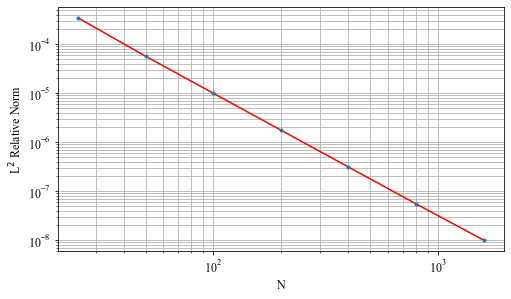

Line Slope and r^2 value:


-2.5085288367075416

-0.9999763886092459

In [5]:
#Part D
def L2_error(n):
    top = la.norm(phi_num(n) - phi_ana(n)[1], 2)
    bot = la.norm(phi_ana(n)[1], 2)
    return  top/bot

#Plotting
N_arrD = np.array([25,50,100,200,400,800,1600])
err_arrD = np.zeros(len(N_arrD))
for i in range(len(N_arrD)):
    err_arrD[i] = L2_error(N_arrD[i])

plt.figure(figsize=(8,4.5))
slope, intercept, r_value, p_value, std_err = scipy.stats.linregress(np.log10(N_arrD), np.log10(err_arrD))
plt.loglog(N_arrD, err_arrD, color='r'), plt.loglog(N_arrD, err_arrD, '.')
plt.xlabel('N'), plt.ylabel('L$^{2}$ Relative Norm'), plt.grid(which='both')
#plt.savefig(save_path+'1D.png', dpi=600)
plt.show()

print('Line Slope and r^2 value:')
display(slope, r_value)